# Chapter 2, First-order Differential Equaitons

## 2.1 Linear Differential Equations; Method of Integrating Factors

이 Chapter에서는 Integrating Factors를 통해 구하는 해를 구하는 방법에 대해 다룹니다. 하지만 sympy를 이용하면 integrating Factor 부분을 skip하고 해를 구하기에, Integrating factor를 직접 구하는 프로그램을 구현해보겠습니다.

In [26]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(t*sy.diff(y, t, 1) + 2 * y - 4 *(t**2),0)


initial_t = 1
initial_y = 2
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

sol = sy.dsolve(eq, y, ics=initial_condition)

print("solution : ", end = "")
sol.rhs


solution : 

 4    
t  + 1
──────
   2  
  t   

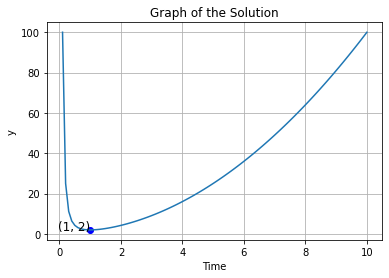

In [27]:

# 해결된 결과 중에서 식 부분만 추출
sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# 그래프를 그리기 위한 t 값 배열 생성
t_values = np.linspace(0.1, 10, 100)

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)



# 그래프 그리기
plt.scatter(initial_t, initial_y, color='blue', marker='o')
plt.text(initial_t, initial_y, f'({initial_t}, {initial_y})', fontsize=12, ha='right')
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.grid(True)
plt.show()


여기서 Integrating Factor에 대해서 다루어 보겠습니다.

$\frac{{dy}}{{dt}} + p(t) y = g(t)$인 경우에

$\text{{Integrating Factor}} = e^{\int p(t) \, dt}$ 임을 이용하겠습니다.

In [2]:
import sympy as sy
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(t* sy.diff(y, t, 1) + 2 * y, 4 * t**2)

# dy/dt의 계수를 구함
coeff_dydt = eq.lhs.coeff(sy.diff(f(t), t, 1)) - eq.rhs.coeff(sy.diff(f(t), t, 1))

# y의 계수를 구함
coeff_y = eq.lhs.coeff(f(t)) - eq.rhs.coeff(f(t))


if coeff_dydt == 0:
    print("There is no Integrating_factor")
else:
    # 계수들로 통합 인자 계산
    integrating_factor = sy.exp(sy.integrate(coeff_y / coeff_dydt, t))
    display(sy.Eq(sy.Symbol("\\text{integrating_factor}"), integrating_factor))

                             2
\text{integrating_factor} = t 

## 2.2 Seperable Differential Equations

Separable Differential Equations는 비선형 미분 방정식으로 Sympy로 푸는데 한계가 있음을 알았습니다.

더 조사해보니 대수적인 해를 구하는 것은 힘들고, Scipy라는 프로그램을 이용하면 수치적으로 구할 수 있다는 것을 알았습니다. 

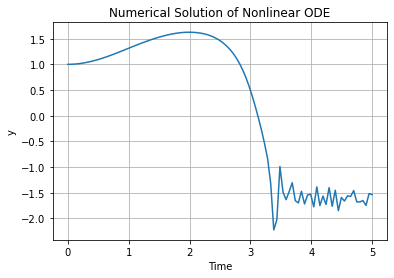

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func(t, y):
    dydt = (4 * t - t**3) / (4 + y**3)
    return dydt

t_span = (0, 5)
y0 = [1]

sol = solve_ivp(func, t_span, y0, t_eval=np.linspace(0, 5, 100))

plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Numerical Solution of Nonlinear ODE')
plt.grid(True)
plt.show()


## 2.3 Modeling with First-Order Linear Differential Equations

이 Chapter는 공학적인 환경에서 미분방정식을 이용해 모델링하고, 그 해를 찾아내는 것에 대해 다룹니다. 위의 코드들과 크게 다른 점이 없기에 skip하겠습니다.

## 2.4 Differences Between Linear and Nonlinear Differential Equations & 2.5 Autonomous Differential Equations and Population Dynmaics

Chapter 2.4는 해의 존재성, 유일성에 관한 증명 Chapter이기에 skip하겠습니다.

Chapter 2.5 역시나 Expotential Growth, logistic equation 등 First-order Differential Equations의 모델링에 다루기에 skip하겠습니다

## 2.6 Exact Differential Equations and Integrating Factors

이 chapter에서는 Exact Differential Equation의 해의 유일성, 존재성, 그에 따른 Integrating factor를 구하는 방법에 대해 다룹니다. 

일반적인 형태의 미분방정식을 입력하고, Exact Differential EQuation을 찾을 수 있는 프로그램을 작성하려 했으나 Sympy에 대한 이해 부족으로 현재는 표준 형태의 N, M을 입력받는 프로그램을 작성했습니다.

Chapter 2.1처럼 해를 구하고 수식을 이용하여 Integrating Factor를 구해보겠습니다.

In [33]:
import sympy as sy
from sympy import init_printing

init_printing(use_latex='mathjax')

f = sy.Function('f')
x = sy.symbols('x')
y = sy.symbols('y')
#함수로서의 f, 미지수로서의 x,y를 선언

N = x**3 - sy.sin(y)
M = 3*(x**2)*y - sy.cos(x)
#표준형태의 N, M으로 입력을 받도록 함.

My = sy.diff(M, y)
Nx = sy.diff(N, x)

is_exact = Nx == My

if is_exact:
    print("This equation is exact differntial equation.")

    # 포텐셜 함수 정의
    g = sy.Function('g')(y)  # g(y)를 y의 함수로 정의
    potential_function = sy.integrate(M, x) + g
    
    # g(y)에 대해 해 구하기
    g_eq = potential_function.diff(y) - N
    g_sol = sy.dsolve(g_eq, g)
    
    # 구한 g(y) 해를 포텐셜 함수에 대입
    potential_function = potential_function.subs({g: g_sol.rhs})

    # x의 함수로서 y 구하기
    y_sol_eq = potential_function - sy.Symbol('C1')  # C1은 적분 상수
    y_sol_eq = y_sol_eq.simplify()  # 방정식을 단순화
    c = sy.symbols('c')
    answer = sy.Eq(y_sol_eq, c)
    
    print("Solution : ")
    display(answer)

else:
    print("This equation is NOT exact differntial equation.")


This equation is exact differntial equation.
Solution : 


 3                        
x ⋅y - sin(x) + cos(y) = c

Exact하다면 이렇게 해를 구할 수 있고, 

In [37]:
import sympy as sy
from sympy import init_printing

init_printing(use_latex='mathjax')

f = sy.Function('f')
x = sy.symbols('x')
y = sy.symbols('y')
#함수로서의 f, 미지수로서의 x,y를 선언

N = 2*x**2 - x*y
M = 6*x*y - y**2
#표준형태의 N, M으로 입력을 받도록 함.

My = sy.diff(M, y)
Nx = sy.diff(N, x)

is_exact = Nx == My

if is_exact:
    print("This equation is exact differntial equation.")

    # 포텐셜 함수 정의
    g = sy.Function('g')(y)  # g(y)를 y의 함수로 정의
    potential_function = sy.integrate(M, x) + g
    
    # g(y)에 대해 해 구하기
    g_eq = potential_function.diff(y) - N
    g_sol = sy.dsolve(g_eq, g)
    
    # 구한 g(y) 해를 포텐셜 함수에 대입
    potential_function = potential_function.subs({g: g_sol.rhs})

    # x의 함수로서 y 구하기
    y_sol_eq = potential_function - sy.Symbol('C1')  # C1은 적분 상수
    y_sol_eq = y_sol_eq.simplify()  # 방정식을 단순화
    c = sy.symbols('c')
    answer = sy.Eq(y_sol_eq, c)
    
    print("Solution : ")
    display(answer)

else:
    print("This equation is NOT exact differntial equation.")
    
    if N == 0:
        print("There is no Integrating_factor for x")
    else:
        # 계수들로 통합 인자 계산
        integrating_factor_x = sy.exp(sy.integrate((My - Nx) / N, x))
        display(sy.Eq(sy.Symbol("\\text{integrating_factor_x}"), integrating_factor_x))
    
    if N == 0:
        print("There is no Integrating_factor for x")
    else:
        # 계수들로 통합 인자 계산
        integrating_factor_y = sy.exp(sy.integrate((Nx - My) / N, y))
        display(sy.Eq(sy.Symbol("\\text{integrating_factor_y}"), integrating_factor_y))
           

This equation is NOT exact differntial equation.


\text{integrating_factor_x} = x

                               -y 
                               ───
                                x 
\text{integrating_factor_y} = ℯ   

아니라면 이렇게 Integrating factor만 구할 수 있습니다.

## 2.7 Numerical Approximations : Euler's Method

이 장은 앞에서 다루었던 것과는 다르게 Analytic하게 풀 수 없는 문제들에 대해 근사적인 답을 컴퓨터로 구하는 것에 대해 다룹니다. 여기서는 그 방법 중 Euler's Method에 대해 다루고 있습니다.

간략 하게 말하면 구간 $$[t_0 , t_n]$$을 설정하고

$$[t_0, t_1]$$에 대해서는 이 식으로 다루고
$$y = y_0 + f(t_0, y_0)(t - t_0)$$ 

그 다음 구간에는
$$y_1 = y_0 + f(t_0, y_0)(t_1 - t_0)$$ 을 이용해서
$$y = y_1 + f(t_1, y_1)(t - t_1)$$ 으로 다루며

일반화해서 $$t_n$$에 도달했을때 모이는 tangnt_line들의 추세로 답을 추정하는 방법입니다.

그런데 여기서 중요한 것은 n이 많으면 많아질 수록 정답과 근접하게 유추할 수 있다는 점입니다.
실제로 한번 해보겠습니다.

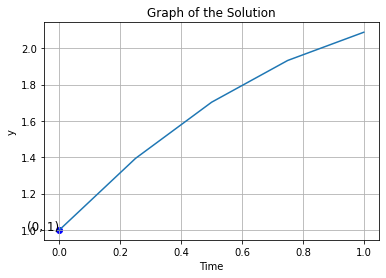

In [44]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(sy.diff(y, t, 1), 2 - t - (1/4)*y)

# 초기 조건: f(0) = 1 (예시로 지정)

initial_t = 0
initial_y = 1
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

t_values = np.linspace(0.0, 1.0, 5)

sol = sy.dsolve(eq, y, ics=initial_condition)

sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)

# 그래프 그리기
plt.scatter(initial_t, initial_y, color='blue', marker='o')
plt.text(initial_t, initial_y, f'({initial_t}, {initial_y})', fontsize=12, ha='right')
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.grid(True)
plt.show()



이 그래프가 Analytic한 Solution으로 위에서 구한 코드들로 구한 값입니다. 이제는 Euler's method로 추정해 보겠습니다.

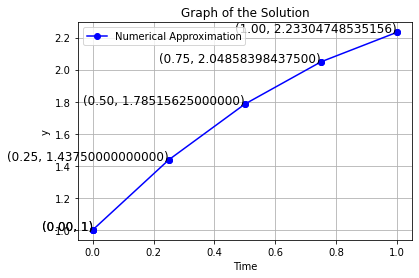

In [77]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
f_eq = sy.Eq(f(t).diff(t), 2 - t - (1/4)*f(t))

# 초기 조건: f(0) = 1 (예시로 지정)
initial_t = 0
initial_y = 1

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

start = 0.0
end = 1.0
num_points = 5  # 데이터 포인트 수

t_values = np.linspace(start, end, num_points)
y_values = []

plots = [(initial_t, initial_y)]

for t_val in t_values:
    y_val = initial_condition[f(initial_t)]
    y_values.append(y_val)
    
    f_n = f_eq.rhs.subs({t: initial_t, f(t): y_val})
    eq_n = sy.Eq(f(t) + f_n*(t - initial_t), y_val + f_n*(t_val - initial_t))
    
    initial_t = t_val
    initial_condition = {f(initial_t): eq_n.rhs}
    plots.append((initial_t, initial_condition[f(initial_t)]))

# 그래프 그리기
plt.plot([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o', label='Numerical Approximation')
plt.scatter([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o')
for t_val, y_val in plots:
    plt.text(t_val, y_val, f'({t_val:.2f}, {y_val})', fontsize=12, ha='right')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.legend()
plt.grid(True)
plt.show()


이제 두 그래프를 겹쳐서 비교해보겠습니다

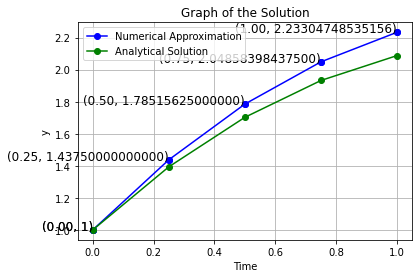

In [79]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
f_eq = sy.Eq(f(t).diff(t), 2 - t - (1/4)*f(t))

# 초기 조건: f(0) = 1 (예시로 지정)
initial_t = 0
initial_y = 1

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

start = 0.0
end = 1.0
num_points = 5  # 데이터 포인트 수

t_values = np.linspace(start, end, num_points)
y_values = []

plots = [(initial_t, initial_y)]

for t_val in t_values:
    y_val = initial_condition[f(initial_t)]
    y_values.append(y_val)
    
    f_n = f_eq.rhs.subs({t: initial_t, f(t): y_val})
    eq_n = sy.Eq(f(t) + f_n*(t - initial_t), y_val + f_n*(t_val - initial_t))
    
    initial_t = t_val
    initial_condition = {f(initial_t): eq_n.rhs}
    plots.append((initial_t, initial_condition[f(initial_t)]))

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(sy.diff(y, t, 1), 2 - t - (1/4)*y)

# 초기 조건: f(0) = 1 (예시로 지정)

initial_t = 0
initial_y = 1
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

t_values = np.linspace(0.0, 1.0, 5)

sol = sy.dsolve(eq, y, ics=initial_condition)

sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)
    
# 그래프 그리기
plt.plot([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o', label='Numerical Approximation')
plt.scatter([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o')
for t_val, y_val in plots:
    plt.text(t_val, y_val, f'({t_val:.2f}, {y_val})', fontsize=12, ha='right')
plt.plot(t_values, y_values, color='green', marker='o', label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.legend()
plt.grid(True)
plt.show()



약간의 유사도가 보이는 것 같지만, 아직은 부족하게 느껴집니다.
여기서 배운대로 n의 개수를 크게하여 구간을 더 촘촘하게 해보겠습니다

n : 20

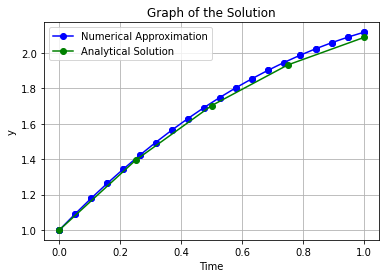

In [81]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
f_eq = sy.Eq(f(t).diff(t), 2 - t - (1/4)*f(t))

# 초기 조건: f(0) = 1 (예시로 지정)
initial_t = 0
initial_y = 1

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

start = 0.0
end = 1.0
num_points = 20  # 데이터 포인트 수

t_values = np.linspace(start, end, num_points)
y_values = []

plots = [(initial_t, initial_y)]

for t_val in t_values:
    y_val = initial_condition[f(initial_t)]
    y_values.append(y_val)
    
    f_n = f_eq.rhs.subs({t: initial_t, f(t): y_val})
    eq_n = sy.Eq(f(t) + f_n*(t - initial_t), y_val + f_n*(t_val - initial_t))
    
    initial_t = t_val
    initial_condition = {f(initial_t): eq_n.rhs}
    plots.append((initial_t, initial_condition[f(initial_t)]))

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(sy.diff(y, t, 1), 2 - t - (1/4)*y)

# 초기 조건: f(0) = 1 (예시로 지정)

initial_t = 0
initial_y = 1
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

t_values = np.linspace(0.0, 1.0, 5)

sol = sy.dsolve(eq, y, ics=initial_condition)

sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)
    
# 그래프 그리기
plt.plot([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o', label='Numerical Approximation')
plt.scatter([t_val for t_val, y_val in plots], [y_val for t_val, y_val in plots], color='blue', marker='o')
plt.plot(t_values, y_values, color='green', marker='o', label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.legend()
plt.grid(True)
plt.show()



구간수를 촘촘하게 하니 거의 유사해진 모습을 확인 할 수 있었습니다.

## 2.8 The existence of Uniqueness Theorem & 2.9 First-Order Difference Equations

Analytical한 증명을 다루고 있으므로 skip하겠습니다.

Chatper 2.9는 2.5에 이어 동물 개체군의 differential equation을 통한 cycle 예측, 번식 양, 이주 양에 따른 discrete difference Equation을 만드는 방법을 다루는데 공학적인 내용이 주류라 역시 skip하겠습니다